In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526.csv")

In [49]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [50]:
df.isnull().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


In [51]:
df['Other'] = df['Other'].fillna(0)

In [52]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Total Journeys'] = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1)
df['YearMonth'] = df['Date'].dt.to_period('M')

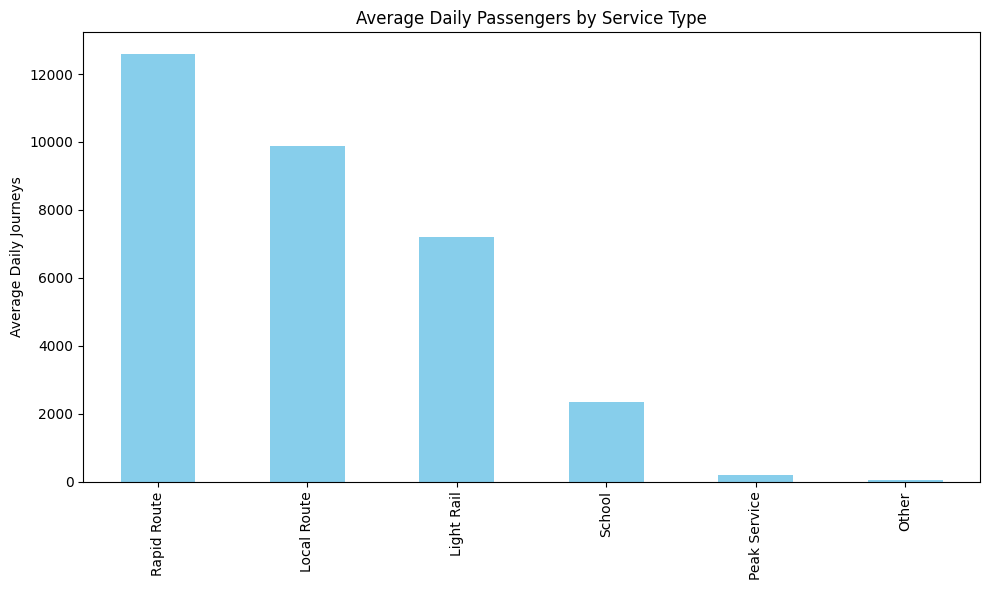

In [53]:
avg_by_service = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].mean().sort_values(ascending=False)
avg_by_service.plot(kind='bar', figsize=(10, 6), title="Average Daily Passengers by Service Type", color='skyblue')
plt.ylabel("Average Daily Journeys")
plt.tight_layout()
plt.show()

In [54]:
school_stats = df['School'].describe()
school_zero_days = (df['School'] == 0).sum()
print("School Service Description:\n", school_stats)
print("Days with Zero School Passengers:", school_zero_days)

School Service Description:
 count    1918.000000
mean     2352.694995
std      2494.766306
min         0.000000
25%         0.000000
50%       567.500000
75%      4914.000000
max      7255.000000
Name: School, dtype: float64
Days with Zero School Passengers: 901


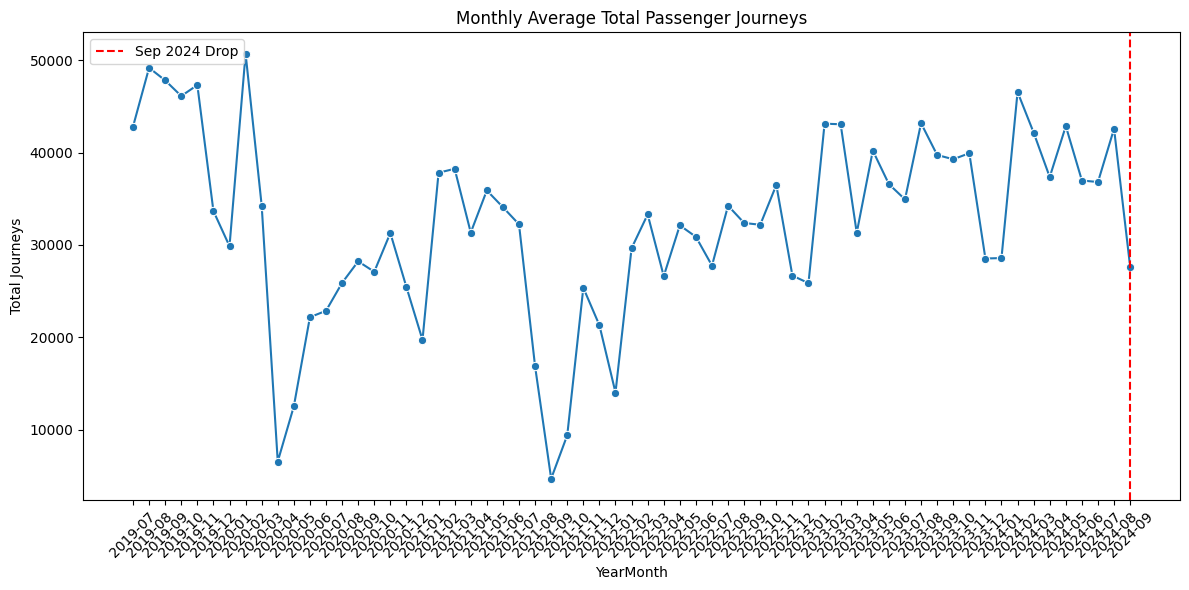

In [55]:
monthly_avg = df.groupby('YearMonth')[['Total Journeys']].mean().reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='YearMonth', y='Total Journeys', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Average Total Passenger Journeys")
plt.axvline(x='2024-09', color='red', linestyle='--', label='Sep 2024 Drop')
plt.legend()
plt.tight_layout()
plt.show()

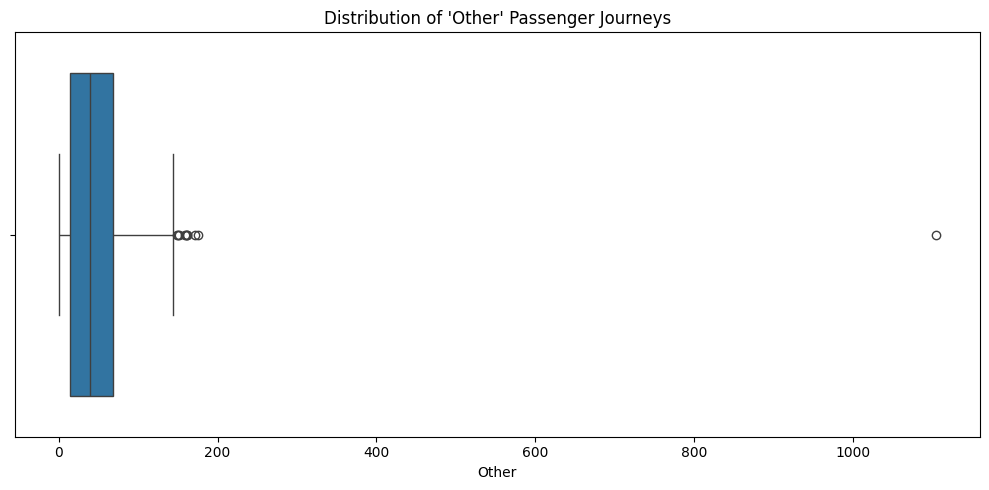

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Other'])
plt.title("Distribution of 'Other' Passenger Journeys")
plt.tight_layout()
plt.show()

Weekday
Wednesday    41836.244526
Tuesday      41572.350365
Thursday     41104.802920
Friday       39379.200730
Monday       36139.364964
Saturday     14931.828467
Sunday       10851.091241
Name: Total Journeys, dtype: float64


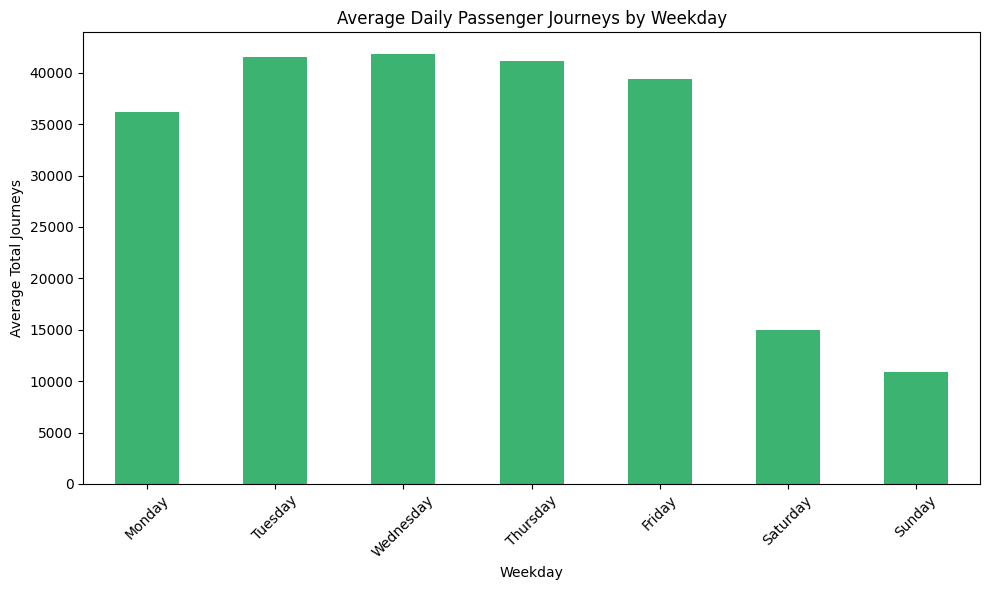

In [58]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Total Journeys'] = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1)
df['Weekday'] = df['Date'].dt.day_name()
avg_by_weekday = df.groupby('Weekday')['Total Journeys'].mean().sort_values(ascending=False)
print(avg_by_weekday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_weekday = avg_by_weekday.reindex(ordered_days)
plt.figure(figsize=(10, 6))
avg_by_weekday.plot(kind='bar', color='mediumseagreen')
plt.title("Average Daily Passenger Journeys by Weekday")
plt.ylabel("Average Total Journeys")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Forecast**